## A. Compute performance metrics for the given data 5_a.csv

  Note 1: in this data you can see number of positive points >> number of negatives points

  Note 3: you need to derive the class labels from given score

  $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$


 - Compute Confusion Matrix

 - Compute F1 Score

 - Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use

 numpy.trapz(tpr_array, fpr_array)

 https://stackoverflow.com/q/53603376/4084039

 https://stackoverflow.com/a/39678975/4084039

 Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)

- Compute Accuracy Score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# imporint roc_auc_score from sklearn to cross check
# scores with my custom function's output
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

# df_5_a = pd.read_csv('../Instructions-AML/5_a.csv')
df_5_a = pd.read_csv('https://raw.githubusercontent.com/rohan-paul/Multiple-Dataset/main/5-Performance-metrics-without-Sklearn/5_a.csv')
print(df_5_a.shape)
df_5_a.head()

(10100, 2)


,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [2]:
df_5_a['y_predicted'] = np.where(df_5_a['proba'] >= 0.5, float(1), float(0))
df_5_a.head()


,y,proba,y_predicted
0,1.0,0.637387,1.0
1,1.0,0.635165,1.0
2,1.0,0.766586,1.0
3,1.0,0.724564,1.0
4,1.0,0.889199,1.0


In [3]:
# Checking to see if there's any 'proba' less than or equal to 0.5
# And there is none. So all y_predicted will be classified as 1
# df = df_5_a.loc[df_5_a['proba'] <= 0.5 ]
# df.head()

In [4]:
# print(df_5_a.to_numpy())
actual_y_train_arr = df_5_a.iloc[:, 0].values
predicted_y_arr = df_5_a.iloc[:, 2].values
y_proba = df_5_a.iloc[:, 1].values


In [5]:
def get_confusion_matrix(true_y_classes_array, predicted_y_classes_array):

  unique_classes = np.unique(true_y_classes_array)
  # For a binary class the above will give me [0 1] numpy array
  # so top-left of confusion matrix will start from 0 i.e. 'True Negative'

  # But the challenge here asks that the top left will be 'True Positive'
  # Hence I need to reverse the above numpy array
  unique_classes = unique_classes[::-1]
  # print('reversed unique', unique_classes) # will convert the above array to [1 0]

  # initialize a matrix with zero values that will be the final confusion matrix
  # For the binary class-label dataset, this confusion matrix will be a 2*2 square matrix
  confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))

  for i in range(len(unique_classes)):
    for j in range(len(unique_classes)):
      confusion_matrix[i, j] = np.sum((true_y_classes_array == unique_classes[j]) & (predicted_y_classes_array == unique_classes[i]))

  return confusion_matrix

confusion_matrix_5_a = get_confusion_matrix(actual_y_train_arr, predicted_y_arr)
print(confusion_matrix_5_a)

true_negative, false_positive, false_negative, true_positive = int(confusion_matrix_5_a[1][1]), int(confusion_matrix_5_a[0][1]), int(confusion_matrix_5_a[1][0]), int(confusion_matrix_5_a[0][0])

[[10000.   100.]
 [    0.     0.]]


### Explanations and notes on above Confusion matrix function

![img](https://i.imgur.com/1A3Izpg.png)

#### Note `unique_classes[0]` is 1 and `unique_classes[1]` = 0

### For first row of my final confusion_matrix

`confusion_matrix[0,0]` => i.e. i, j = 0, 0 => will have the Total 'True' count (i.e. `np.sum()`) of following conditions

`(true_y_classes_array == unique_classes[0]) & (predicted_y_classes_array == unique_classes[0])`

Similarly for `confusion_matrix[0, 1]` => i.e. i, j = 0, 1 => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

`(true_y_classes_array == unique_classes[1]) & (predicted_y_classes_array == unique_classes[0])`

---

### Now second row

And for second row of my final confusion_matrix

`confusion_matrix[1,0]`  => i.e. i, j = 1, 0 => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

`(true_y_classes_array == unique_classes[0]) & (predicted_y_classes_array == unique_classes[1])`

Similarly for `confusion_matrix[1, 1]`  => i.e. i, j = 1, 1  => will have the Total 'True' count (i.e. `np.sum()`) of following conditions


`(true_y_classes_array == unique_classes[1]) & (predicted_y_classes_array == unique_classes[1])`

In [6]:
# To check that the total num of elements of the original dataframe matches
# with the counts captured in the confusion matrix
# sum-all-the-elements-of-the confusion_matrix_5_a
sum_all_elements_of_confusion_matrix = np.concatenate(confusion_matrix_5_a).sum()
print(sum_all_elements_of_confusion_matrix == df_5_a.shape[0] )

True


In [7]:
# Testing my custom confusion_matrix result with scikit-learn
from sklearn.metrics import confusion_matrix
sklearn_confustion_matrix = confusion_matrix(actual_y_train_arr, predicted_y_arr)
print(sklearn_confustion_matrix)

[[    0   100]
 [    0 10000]]


In [8]:
# Verifying individual elements of the Confusion matrix from my custom result with scikit-learn
tn, fp, fn, tp = confusion_matrix(actual_y_train_arr, predicted_y_arr).ravel()
print("From Scikit learn ", tn, fp, fn, tp)
print("From our custom function ", true_negative, false_positive, false_negative, true_positive)

From Scikit learn  0 100 0 10000
From our custom function  0 100 0 10000


### From above we can see the values of the confution Matrix matches between scikit-learn and our custom-implementation

---

## F1 Score

![img](https://i.imgur.com/ZPntYB0.jpg)

![Imgur](https://imgur.com/qy5Fesd.jpg)


In [9]:
# the below function will work only for
# binary confusion matrix
def get_f1_score_accuracy_score(binary_conf_matrix):
    true_negative  = binary_conf_matrix[1][1]    
    false_positive = binary_conf_matrix[0][1]
    false_negative = binary_conf_matrix[1][0]
    true_positive = binary_conf_matrix[0][0]

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive/ (true_positive + false_negative)
    
    f1_score = (2 * (precision * recall)) / (precision + recall )
    
    sum_all_elements_of_confusion_matrix = np.concatenate(binary_conf_matrix).sum()
    
    accuracy_score = (true_positive + true_negative)/sum_all_elements_of_confusion_matrix
    
    return f1_score, accuracy_score


print("My custom function's f1_score and accuracy_score ", get_f1_score_accuracy_score(confusion_matrix_5_a))  



My custom function's f1_score and accuracy_score  (0.9950248756218906, 0.9900990099009901)


### Now verifying the above F1-Score with that of sk-learn


In [10]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

sklearn_f1_score = f1_score(actual_y_train_arr, predicted_y_arr)
print('sklearn_f1_score ', sklearn_f1_score)

sklearn_accuracy_score = accuracy_score(actual_y_train_arr, predicted_y_arr)
print('sklearn_accuracy_score ', sklearn_accuracy_score)


sklearn_f1_score  0.9950248756218906
sklearn_accuracy_score  0.9900990099009901


### From above we can see the values of F1_score, accuracy_score matches between scikit-learn and our custom-implementation

---

## AUC-ROC Score Calculation

The Receiver Operating Characetristic (ROC) curve is a graphical plot that allows us to assess the performance of binary classifiers. With imbalanced datasets, the Area Under the Curve (AUC) score is calculated from ROC and is a very useful metric in imbalanced datasets.

TPR and FPR are defined as follows:

- TPR = True Positives / All Positives = True Positives / (TP + FN)
- FPR = False Positives / All negatives = False Positives / ( FP + TN )

In [11]:

def get_single_tpr_fpr(df):

    '''
    Note, this implementation is only for binaly class labels (0 and 1)
    :param df: the dataframe should have 'y' and 'y_predicted' as its labels
    :return: a list containing tpr and fpr
    '''

    tp = ((df['y'] == 1.0 ) & (df['y_predicted'] == 1)).sum()
    fp = ((df['y'] == 0.0 ) & (df['y_predicted'] == 1)).sum()
    tn = ((df['y'] == 0.0 ) & (df['y_predicted'] == 0)).sum()
    fn = ((df['y'] == 1.0 ) & (df['y_predicted'] == 0)).sum()

    tpr = tp / (tp + fn )
    fpr = fp / (fp + tn)

    return [tpr, fpr]


# While computing AUC score you need to calculate "TP,"FP" at every threshold by using actual "y" and predicted "y_pred".

def calculate_all_thresholds_tpr_fpr_arr(df_original):

    '''

    :param df_original: the original dataframe, which should have a 'proba' label
    :return: two arrays, tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds
    '''

    tpr_arr_for_all_thresholds = []
    fpr_arr_for_all_thresholds = []

    sorted_df = df_original.sort_values(by=['proba'], ascending=False)

    unique_probability_thresholds = sorted_df['proba'].unique()

    for threshold in tqdm(unique_probability_thresholds):
        sorted_df['y_predicted'] = np.where(sorted_df['proba'] >= threshold, 1, 0)
        tpr_fpr_arr = get_single_tpr_fpr(sorted_df)
        tpr_arr_for_all_thresholds.append(tpr_fpr_arr[0])
        fpr_arr_for_all_thresholds.append(tpr_fpr_arr[1])

    return tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds


### Now finally the AUC Score


In [12]:
all_tpr_together_5_a, all_fpr_together_5_a = calculate_all_thresholds_tpr_fpr_arr(df_5_a)
auc_score_5_a = np.trapz(all_tpr_together_5_a, all_fpr_together_5_a)
print('My Custom function ROC-AUC Score for 5_a.csv: ', auc_score_5_a)
# My Custom function ROC-AUC Score for 5_a.csv:  0.48829900000000004

100%|██████████| 10100/10100 [00:50<00:00, 201.25it/s]


My Custom function ROC-AUC Score for 5_a.csv:  0.48829900000000004


In [13]:
# Checking result with scikit-learn
sklearn_roc_auc_score = roc_auc_score(actual_y_train_arr, y_proba)
print('sk-learn roc_auc_score for 5_a.csv: ', sklearn_roc_auc_score)
# sk-learn roc_auc_score:  0.48829900000000004

sk-learn roc_auc_score for 5_a.csv:  0.48829900000000004


#### As we can see above the roc_auc_score matches between my Custom function and that of sklearn

Text(0.5, 1.0, 'AUC=0.4883')

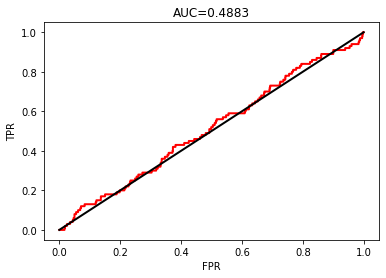

In [14]:
# Plotting of ROC-AUC Curve

plt.plot(all_tpr_together_5_a, all_fpr_together_5_a, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score_5_a, 4)))


## Assignment-B for 5_b.csv

Compute Confusion Matrix

Compute F1 Score

Compute AUC Score

Compute Accuracy Score

In [15]:
# df_5_b = pd.read_csv('../Instructions-AML/5_b.csv')
df_5_b = pd.read_csv('https://raw.githubusercontent.com/rohan-paul/Multiple-Dataset/main/5-Performance-metrics-without-Sklearn/5_b.csv')
print('df_5_b.shape ', df_5_b.shape)
df_5_b.head()

df_5_b['y_predicted'] = np.where(df_5_b['proba'] >= 0.5, float(1), float(0))
df_5_b.head()

df_5_b.shape  (10100, 2)


,y,proba,y_predicted
0,0.0,0.281035,0.0
1,0.0,0.465152,0.0
2,0.0,0.352793,0.0
3,0.0,0.157818,0.0
4,0.0,0.276648,0.0


In [16]:
actual_y_train_arr_5_b = df_5_b.iloc[:, 0].values
print('actual_y_train_arr_5_b ', actual_y_train_arr_5_b)
predicted_y_arr_5_b = df_5_b.iloc[:, 2].values
print('predicted_y_arr_5_b ', predicted_y_arr_5_b)

actual_y_train_arr_5_b  [0. 0. 0. ... 0. 0. 0.]
predicted_y_arr_5_b  [0. 0. 0. ... 0. 0. 0.]


In [17]:
y_proba_5_b = df_5_b.iloc[:, 1].values

## Compute Confusion Matrix - for 5_b.csv


In [18]:
confusion_matrix_5_b = get_confusion_matrix(actual_y_train_arr_5_b, predicted_y_arr_5_b)
print(confusion_matrix_5_b)

true_negative_5_b, false_positive_5_b, false_negative_5_b, true_positive_5_b = int(confusion_matrix_5_b[1][1]), int(confusion_matrix_5_b[0][1]), int(confusion_matrix_5_b[1][0]), int(confusion_matrix_5_b[0][0])

[[  55.  239.]
 [  45. 9761.]]


In [19]:
# Testing my custom confusion_matrix result with scikit-learn for 5_b.csv
sklearn_confustion_matrix_5_b = confusion_matrix(actual_y_train_arr_5_b, predicted_y_arr_5_b)
print(sklearn_confustion_matrix_5_b)

[[9761  239]
 [  45   55]]


In [20]:
# for 5_b.csv
# Verifying individual elements of the Confusion matrix from my custom result with scikit-learn
tn_5_b, fp_5_b, fn_5_b, tp_5_b = confusion_matrix(actual_y_train_arr_5_b, predicted_y_arr_5_b).ravel()
print(tn_5_b, fp_5_b, fn_5_b, tp_5_b)
print(true_negative_5_b, false_positive_5_b, false_negative_5_b, true_positive_5_b)

9761 239 45 55
9761 239 45 55


### for 5_b.csv

### From above we can see the values of the confusion Matrix matches between scikit-learn and our custom-implementation for 5_b.csv

---

## Compute F1 Score - for 5_b.csv

In [21]:
print(get_f1_score_accuracy_score(confusion_matrix_5_b))

(0.2791878172588833, 0.9718811881188119)


### Now verifying the above F1-Score with that of sk-learn for 5_b.csv

In [22]:
sklearn_f1_score_5_b = f1_score(actual_y_train_arr_5_b, predicted_y_arr_5_b)
print(sklearn_f1_score_5_b)

sklearn_accuracy_score_5_b = accuracy_score(actual_y_train_arr_5_b, predicted_y_arr_5_b)
print(sklearn_accuracy_score_5_b)



0.2791878172588833
0.9718811881188119


### for 5_b.csv

### From above we can see the values of F1_score, accuracy_score matches between scikit-learn and our custom-implementation - for 5_b.csv

---

### Now finally the AUC Score for 5_b.csv


In [23]:
all_tpr_together_5_b, all_fpr_together_5_b = calculate_all_thresholds_tpr_fpr_arr(df_5_b)
auc_score_5_b = np.trapz(all_tpr_together_5_b, all_fpr_together_5_b)
print('My custom function AUC Score for 5_b.csv ', auc_score_5_b)
# My custom function AUC Score for 5_b.csv  0.9377570000000001

100%|██████████| 10100/10100 [00:50<00:00, 199.42it/s]


My custom function AUC Score for 5_b.csv  0.9377570000000001


In [24]:
sklearn_roc_auc_score_5_b = roc_auc_score(actual_y_train_arr_5_b, y_proba_5_b)
print('sklearn_roc_auc_score_5_b - ', sklearn_roc_auc_score_5_b)
# sklearn_roc_auc_score_5_b -  0.9377570000000001

sklearn_roc_auc_score_5_b -  0.9377570000000001


#### As we can see above the roc_auc_score matches between my Custom function and that of sklearn

---

## C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric A for the given data 5_c.csv

you will be predicting label of a data points like this:

$y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

Note 1: in this data you can see number of negative points > number of positive points

In [25]:
# df_5_c = pd.read_csv('../Instructions-AML/5_c.csv')
df_5_c = pd.read_csv('https://raw.githubusercontent.com/rohan-paul/Multiple-Dataset/main/5-Performance-metrics-without-Sklearn/5_c.csv')
print('df_5_c.shape ', df_5_c.shape)
df_5_c.head()

df_5_c.shape  (2852, 2)


,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [26]:
actual_y_train_arr_5_c = df_5_c.iloc[:, 0].values
print('actual_y_train_arr_5_c ', actual_y_train_arr_5_c)

y_proba_5_c = df_5_c.iloc[:, 1].values
print('y_proba_5_c ', y_proba_5_c)

unique_probability_thresholds_5_c = np.unique(df_5_c['prob'])


actual_y_train_arr_5_c  [0 0 0 ... 1 1 1]
y_proba_5_c  [0.45852068 0.50503693 0.41865174 ... 0.65916054 0.45626546 0.65916054]


In [27]:
# First I will modify the above get_tpr_fpr() function to return the value of A

def get_A_metric(y_actual, y_probabilities, threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    min_a = float('inf')

    for i in range(len(y_probabilities)):
        if y_probabilities[i] >= threshold :
            if y_actual[i] == 1:
                tp += 1
            else:
                fp += 1

        if y_probabilities[i] < threshold:
            if y_actual[i] == 0:
                tn += 1
            else:
                fn += 1

    A = (500 * fn) + (100 * fp)

    return A


In [28]:
# Now a function to traverse the entire unique probability thresholds array
# and return the minimum value of A and also the corresponding threshold

def get_minimized_a(y_actual, y_probabilities, total_threshold_arr ):
  min_a = float('inf')
  min_t = 0

  for threshold in total_threshold_arr:
    a = get_A_metric(y_actual, y_probabilities, threshold)
    if a <= min_a:
        min_a = min(a, min_a)
        min_t = threshold

  return min_a, min_t

In [29]:
# now execute the above funtion the minimum value of A and also the corresponding threshold

print(get_minimized_a(actual_y_train_arr_5_c, y_proba_5_c, unique_probability_thresholds_5_c ))
# (141000, 0.2300390278970873)

(141000, 0.2300390278970873)


#### So that thats the minimum value of **A** which is 141000

#### and the corresponding threshold is 0.2300390278970873


---


## D. Compute performance metrics(for regression) for the given data 5_d.csv

Note 1: 5_d.csv will having two columns Y and predicted_Y both are real valued features

Compute Mean Square Error

Compute MAPE:

https://www.youtube.com/watch?v=ly6ztgIkUxk

Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions

---

In [30]:
# df_5_d = pd.read_csv('../Instructions-AML/5_d.csv')
df_5_d = pd.read_csv('https://raw.githubusercontent.com/rohan-paul/Multiple-Dataset/main/5-Performance-metrics-without-Sklearn/5_d.csv')
df_5_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [31]:
# print(df_5_d.to_numpy())
actual_y_train_arr_5d = df_5_d.iloc[:, 0].values
print('actual_y_train_arr_5d ', actual_y_train_arr_5d)
predicted_y_arr_5d = df_5_d.iloc[:, 1].values
print('predicted_y_arr_5d ', predicted_y_arr_5d)

actual_y_train_arr_5d  [101. 120. 131. ... 106. 105.  81.]
predicted_y_arr_5d  [100. 100. 113. ...  93. 101. 104.]


---

## Mean Squared Error (MSE) / Mean Squared Deviation (MSD)

![Imgur](https://imgur.com/GWH0ap5.png)

In [32]:
def calculate_mse(y_actual, y_predicted):
    mse = np.mean((y_actual - y_predicted)**2)
    return mse

print(calculate_mse(actual_y_train_arr_5d, predicted_y_arr_5d))


177.16569974554707


In [33]:
# Checking the Mean Square Error metric with sklearn
from sklearn.metrics import mean_squared_error

sklearn_mse = mean_squared_error(actual_y_train_arr_5d, predicted_y_arr_5d)
sklearn_mse

177.16569974554707

So the Mean Squared Error measures matches between my custom function and sklearn's inbuilt funcion

---

## Mean Absolute Percentage Error (MAPE)

![Imgur](https://imgur.com/zCFJTE6.png)


### When one of the actual data-point is zero

https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

So in that case the formulate becomes

![Imgur](https://imgur.com/Lm45BRD.png)

In [34]:
# The below will return the % value i.e 12.9 means 12.9%
def calculate_mean_absolute_percentage_error_2(y_actual, y_predicted):
    mape = ((np.sum(np.abs(y_actual - y_predicted))) / np.sum(y_actual)) * 100
    return mape

print(calculate_mean_absolute_percentage_error_2(actual_y_train_arr_5d, predicted_y_arr_5d))

12.91202994009687


## Coefficient of determination also called as R2 score

![Imgur](https://imgur.com/X0zWQho.png)

In [35]:
# Checking the r-square metric with sklearn

from sklearn.metrics import r2_score
sklearn_r2 = r2_score(actual_y_train_arr_5d, predicted_y_arr_5d)
sklearn_r2

0.9563582786990937

In [36]:
def calculate_r2_score(y_train, y_predicted):
    y_train_bar = y_train.mean()
    # y_train_bar = np.mean(y_train)

    sum_squared_residual = ((y_train - y_predicted)**2).sum()
    sum_squared_total = ((y_train - y_train_bar)**2).sum()

    return 1 - (sum_squared_residual/sum_squared_total)

print(calculate_r2_score(actual_y_train_arr_5d, predicted_y_arr_5d))


0.9563582786990937


#### So the r-square measures matches between my custom function and sklearn's inbuilt funcion